# Exemplo - Multilayer Perceptron com TensorFlow

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)


# Split dataset
X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values

In [13]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

# Standardize features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Convert class labels into one-hot encoding
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values


In [15]:
# Create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=4, activation='sigmoid'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                320       
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515
Trainable params: 515
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Train model
history = model.fit(X_train_std, y_train_onehot, validation_split=0.2, epochs=100, batch_size=10)

Epoch 1/100
10/10 [==============================] - 0s 17ms/step - loss: 1.1094 - mse: 0.2252 - val_loss: 1.0652 - val_mse: 0.2152
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0460 - mse: 0.2109 - val_loss: 1.0079 - val_mse: 0.2017
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9940 - mse: 0.1985 - val_loss: 0.9652 - val_mse: 0.1912
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.9525 - mse: 0.1885 - val_loss: 0.9239 - val_mse: 0.1815
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 0.9133 - mse: 0.1795 - val_loss: 0.8841 - val_mse: 0.1724
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8740 - mse: 0.1704 - val_loss: 0.8478 - val_mse: 0.1636
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.8391 - mse: 0.1621 - val_loss: 0.8134 - val_mse: 0.1557
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.8044 - 

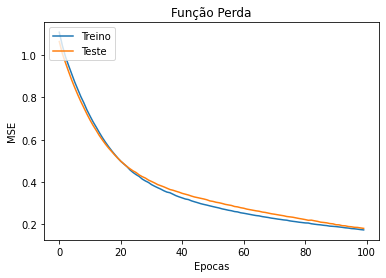

In [18]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Função Perda')
plt.ylabel('MSE')
plt.xlabel('Epocas')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()
